# Compare resolutions (low/medium/high)

Download the same area at three named resolutions to compare speed and output size.

- Area: La Réunion (bbox: [55.0, -21.5, 56.0, -20.5])
- Provider: GMRT GridServer (GeoTIFF)

In [35]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from pygmrt.tiles import download_tiles

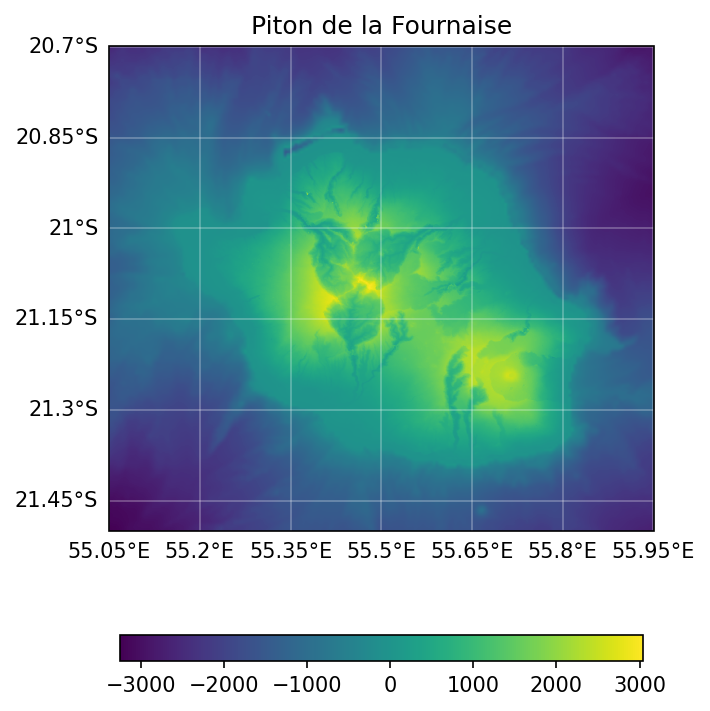

In [34]:
# Piton de la Fournaise
bbox = [55.05, -21.5, 55.95, -20.7]

# Download and get rasterio dataset directly
tiles = download_tiles(bbox=bbox, resolution="high", overwrite=False)

# Read data and plot
topo = tiles.read(1)
topo[np.isnan(topo)] = 0

vabsmax = np.nanmax(abs(topo)) * 1.1
bbox = tiles.bounds
extent = (bbox.left, bbox.right, bbox.bottom, bbox.top)

fig, ax = plt.subplots(
    subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(9, 6), dpi=150
)

mappable = ax.imshow(
    topo,
    extent=extent,
    origin="upper",
    interpolation="none",
    transform=ccrs.PlateCarree(),
)
gridlines = ax.gridlines(draw_labels=True, color="white", alpha=0.3)
gridlines.top_labels = False
gridlines.right_labels = False
ax.set_title("Piton de la Fournaise")
plt.colorbar(mappable, ax=ax, orientation="horizontal", shrink=0.5)


plt.show()